In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Ganjar Pranowo.csv')
df.head()

,Unnamed: 0,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label
0,0,2023-04-16 09:04:01+00:00,2016-05-28 16:50:39+00:00,7.370000e+17,2358,3001,13665,Indonesia,"ganjar is getting more and more support, now s...",Positive
1,1,2023-04-16 08:31:02+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,ojoo lali yooo who is smart chooses pranowo's ...,Positive
2,2,2023-04-16 08:00:00+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,smart people support and reward pranowo well,Positive
3,3,2023-04-16 07:56:29+00:00,2022-06-27 14:13:32+00:00,1.540000e+18,11,78,737,NaN,we believe that pranowo's reward is a gift fro...,Positive
4,4,2023-04-16 07:54:14+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,intelligent people support and reward pranowo ...,Positive


In [ ]:
df.shape

(10000, 10)

In [ ]:
df = df[['Text', 'label']]
df.head()

,Text,label
0,"ganjar is getting more and more support, now s...",Positive
1,ojoo lali yooo who is smart chooses pranowo's ...,Positive
2,smart people support and reward pranowo well,Positive
3,we believe that pranowo's reward is a gift fro...,Positive
4,intelligent people support and reward pranowo ...,Positive


In [ ]:
df.isnull().sum()

,0
Text,115
label,0


In [ ]:
df = df.dropna()
df.shape

(9885, 2)

## Cleaning

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  test = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text)

  return text

In [ ]:
df['Text'] = df['Text'].apply(clean_twitter_text)
df['Text'] = df['Text'].str.lower()
df

,Text,label
0,ganjar is getting more and more support now su...,Positive
1,ojoo lali yooo who is smart chooses pranowos r...,Positive
2,smart people support and reward pranowo well,Positive
3,we believe that pranowos reward is a gift from...,Positive
4,intelligent people support and reward pranowo ...,Positive
...,...,...
9995,rt ganjaristdltras ganjarist deltras east java...,Positive
9996,meaning reward pranowo the president,Positive
9997,more and more people are ready to support ganj...,Positive
9998,rt ganjaristdltras ganjarist deltras east java...,Positive


## Tokenisasi

In [ ]:
regexp = RegexpTokenizer(r'\w+')
df['Text_token'] = df['Text'].apply(lambda x: regexp.tokenize(str(x)))
df.head()

,Text,label,Text_token
0,ganjar is getting more and more support now su...,Positive,"[ganjar, is, getting, more, and, more, support..."
1,ojoo lali yooo who is smart chooses pranowos r...,Positive,"[ojoo, lali, yooo, who, is, smart, chooses, pr..."
2,smart people support and reward pranowo well,Positive,"[smart, people, support, and, reward, pranowo,..."
3,we believe that pranowos reward is a gift from...,Positive,"[we, believe, that, pranowos, reward, is, a, g..."
4,intelligent people support and reward pranowo ...,Positive,"[intelligent, people, support, and, reward, pr..."


## Stopword

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
stopwords_gwehj = ['will', 'come', 'make', 'know', 'want', 'really',
                   'must', 'great', 'time', 'still', 'top', 'two', 'one', 'goodness', 'hopefully', 'god', 'blessing', 'thank']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.loc[:, 'Text_token'] = df.loc[:, 'Text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

,Text,label,Text_token
0,ganjar is getting more and more support now su...,Positive,"[ganjar, getting, support, support, coming, ci..."
1,ojoo lali yooo who is smart chooses pranowos r...,Positive,"[ojoo, lali, yooo, smart, chooses, pranowos, r..."
2,smart people support and reward pranowo well,Positive,"[smart, people, support, reward, pranowo, well]"
3,we believe that pranowos reward is a gift from...,Positive,"[believe, pranowos, reward, gift, allah, almig..."
4,intelligent people support and reward pranowo ...,Positive,"[intelligent, people, support, reward, pranowo..."


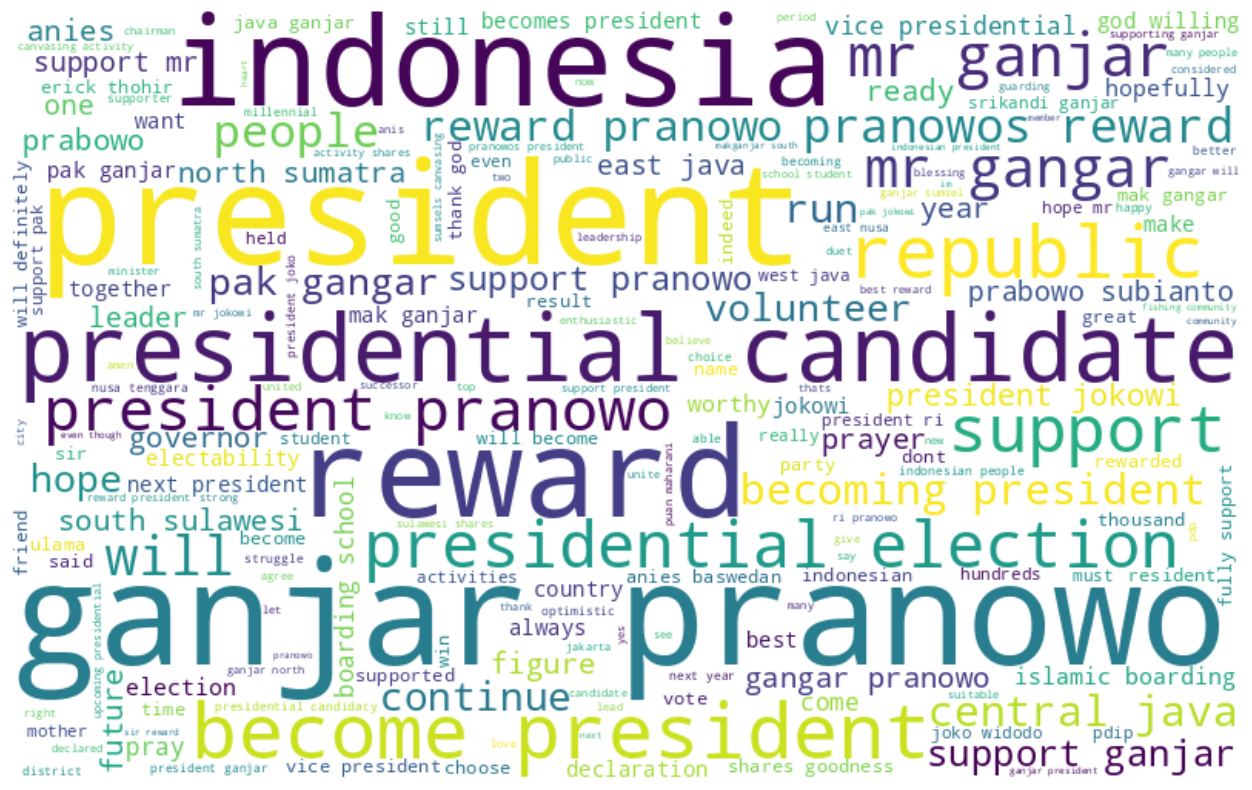

In [ ]:
df_p = df[df['label'] == "Positive"]
all_words_lem = ' '.join([word for word in df_p['Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color='white',
    width = 800,
    height = 500,
    random_state = 21,
    max_font_size = 130
).generate(all_words_lem)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');